<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/DASK_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade 'dask[complete]'

Requirement already up-to-date: dask[complete] in /usr/local/lib/python3.6/dist-packages (2.30.0)
     |████████████████████████████████| 92kB 2.6MB/s 
     |████████████████████████████████| 665kB 8.7MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
  Created wheel for locket: filename=locket-0.2.0-cp36-none-any.whl size=4040 sha256=e160f38abf7f3951f28c1c27f94650adf9d399b1c40d638fd2d2e853cb0e1fcd
  Stored in directory: /root/.cache/pip/wheels/26/1e/e8/4fa236ec931b1a0cdd61578e20d4934d7bf188858723b84698
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=27ad732a7d90c4cd78467256b1b14e725fd84236d68c285a3cb0d34323959b5f
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built locket contextvars
ERROR: distributed 2.30.1 has requirement cloudpickle>=1.5.0, but you'll have cloudpickle 1.3.0 which is incompatible.
  Found existing installation: distributed 1.25.3
    Unins

In [3]:
from dask import delayed

In [4]:
@delayed
def sum(x, y):
  return x+y

In [5]:
@delayed
def sum_and_squared(x,y):
  return(x+y)**2

result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1, result2)
result.compute()

196

In [6]:
import dask.dataframe as dd

In [ ]:
df = dd.read_csv('path to a csv file here')

In [8]:
from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:44733 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


In [10]:
import warnings
warnings.filterwarnings('ignore')

from dask.distributed import Client, progress

client = Client(n_workers=4, threads_per_worker=2, memory_limit='2GB')
client

Client Scheduler: tcp://127.0.0.1:41515 Dashboard: http://127.0.0.1:35637/status,Cluster Workers: 4 Cores: 8 Memory: 8.00 GB


lazy evaluation: codes wont produce the results immediately after we write and run them. instead, the real execution occurs when we need the value to be evaluated. Wikipedia defines lazy evaluation as follows:

"...lazy evaluation, or call-by-need is an evaluation strategy which delays the evaluation of an expression until its value is needed (non-strict evaluation) and which also avoids repeated evaluations (sharing). The sharing can reduce the running time of certain functions by an exponential factor over other non-strict evaluation strategies, such as call-by-name."

In [11]:
from dask import delayed
@delayed
def sum(x, y):
  return x+y 
@delayed
def sum_and_squared(x, y):
  return(x+y)**2


In [12]:
result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1, result2)
result

Delayed('sum_and_squared-6232f25e-2800-4fe6-b9d4-27541e59a93a')

In [13]:
result1 = sum(3,5)
result2 = sum(2,4)
result = sum_and_squared(result1, result2)
result

Delayed('sum_and_squared-69560b0d-76cc-44d2-b9c1-1d64d0f1a532')

As we see, the result isn't 196 but an object of type Delayed. What happened is that Dask has just built up a task execution graph to infer how it can parallelize the operations. But, the evaluation of the result variable hasn't happened yet. This is what we mean by lazy evaluation. Let's have a look at the task graph Dask derived:

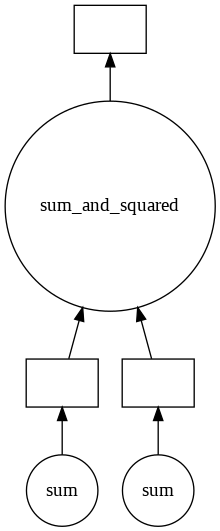

In [14]:
result.visualize()

In [15]:
result.compute()

196